#**Part 1**
##In this part, I have 3 tasks.
##**Task 1**
###Process a Mutiple Sequence Alignment. This is done in unix using:
###_muscle -in seqs.fa -out seqs.aligned.fa_
##**Task 2**
###Produce a phylogenetic tree, also done by unix using:
###_fasttree -nt < seqs.aligned.fa > tree.nwk_
##**Task 3**
###Blast
###According to the phylogenetic tree, I categorize these sequence into 4 clusters:
###_cluster1 : 'rh.50', 'rh.52', 'hu.39', 'rh.53', 'rh.49', 'rh.57', 'rh.51', 'rh.64', 'rh.61', 'rh.58'_
###_cluster2 : 'hu.14', 'hu.32', 'hu.31'_
###_cluster3 : 'pi.3', 'pi.2', 'pi.1','hu.17','hu.6','rh.10','bb.1','bb.2','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.42','hu.41','hu.41','rh.38'
###_cluster4 : 'hu.43','hu.48','hu.44','hu.46','cy.2','rh.54','rh.55','rh.48','rh.62','rh.35','rh.36','rh.37','cy.3','cy.6','cy.4','cy.5','rh.13'_

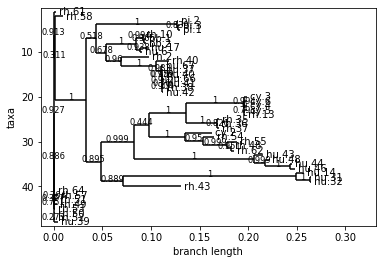

In [6]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
from io import StringIO
tree = Phylo.read("tree.nwk","newick")
Phylo.draw(tree)#draw a tree
my_recs = []
for seq_rec in SeqIO.parse("seqs.fasta","fasta"):
    my_recs.append(seq_rec)
my_ali = []# to make muliple sequence alignment
for seq in SeqIO.parse("seqs.aligned.fasta","fasta"):
    my_ali.append(seq)
     
#Try to gather every id in order
x=[]
for i in range(len(my_ali[0])):
    x.append(i)


x_id = []
for i in range(len(my_ali)):
    x_id.append(my_ali[i].id)

#**Part2**
##Draw a bar plot to show the proportion of AT and CG. 

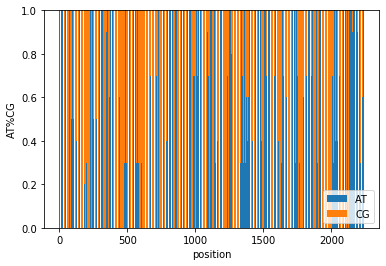

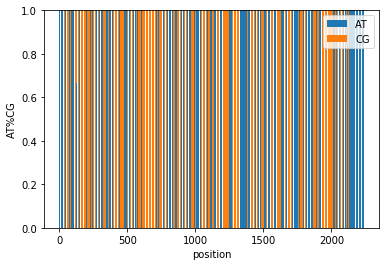

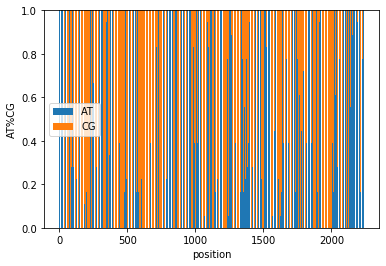

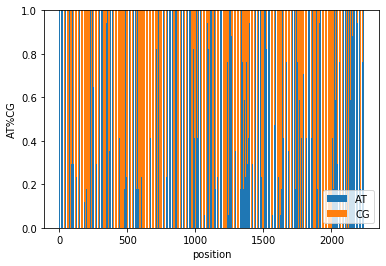

In [5]:
cluster1 = ['rh.50', 'rh.52', 'hu.39', 'rh.53', 'rh.49', 'rh.57', 'rh.51', 'rh.64', 'rh.61', 'rh.58']
cluster2 = ['hu.14', 'hu.32', 'hu.31']
cluster3 = ['pi.3', 'pi.2', 'pi.1','hu.17','hu.6','rh.10','bb.1','bb.2','rh.2','rh.40','hu.67','hu.37','hu.40','hu.66','hu.42','hu.41','hu.41','rh.38']
cluster4 = ['hu.43','hu.48','hu.44','hu.46','cy.2','rh.54','rh.55','rh.48','rh.62','rh.35','rh.36','rh.37','cy.3','cy.6','cy.4','cy.5','rh.13']

def plot_at(cluster0,x_id,my_ali):
    temp_0=[]
    y=[]
    x=[]
    ie = []
    for cluster in cluster0:
        ie.append(x_id.index(cluster))#find the position of certain sequence

    for i in range(len(my_ali[0])):
        temp_1 = []
        at=0
        cg=0
        sp=0
        for j in range(len(ie)):
            temp_0 = my_ali[j]
            if temp_0[i]=='A' or temp_0[i]=='a' or temp_0[i]=='T' or temp_0[i]=='t':
                at=at+1#number of AT
            elif temp_0[i]=='C' or temp_0[i]=='c' or temp_0[i]=='G' or temp_0[i]=='g':
                cg=cg+1#number of CG
            else:
                sp=sp+1#number of --
        f=at/(at+cg+sp)
        y.append(f)
        x.append(1-f)
    #print(y)  

    import matplotlib.pyplot as plt
    plt.xlabel('position')
    plt.ylabel('AT%CG')
    p1 = plt.bar(range(len(y)), y)
    p2 = plt.bar(range(len(y)), x,
           bottom = y)
    plt.legend((p1[0],p2[0]),('AT','CG'))
    plt.show()
    
plot_at(cluster1,x_id,my_ali)
plot_at(cluster2,x_id,my_ali)
plot_at(cluster3,x_id,my_ali)
plot_at(cluster4,x_id,my_ali)

In [7]:
length = []
#Measure the length of every sequence and store in the list-length
for i in range(len(my_recs)):
    temp = my_recs[i]
    length.append(len(temp))

#This function is the dictionary which have the length of every sequence, type the id of gene, find its length
def boxp(cluster0,x_id,length):
    b=[]
    for cluster in cluster0:
        a=x_id.index(cluster)
        b.append(length[a])
    return(b)

b1 = boxp(cluster1,x_id,length)
b2 = boxp(cluster2,x_id,length)
b3 = boxp(cluster3,x_id,length)
b4 = boxp(cluster4,x_id,length)

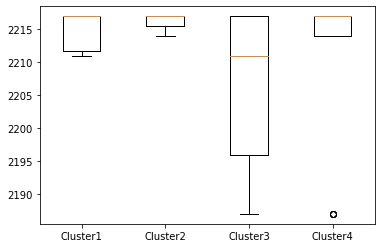

In [6]:
# Draw a boxplot
import numpy as np
b1 = np.array(b1)
a1 = b1.reshape(-1,1)
b2 = np.array(b2)
a2 = b2.reshape(-1,1)
b3 = np.array(b3)
a3 = b3.reshape(-1,1)
b4 = np.array(b4)
a4 = b4.reshape(-1,1)
import matplotlib.pyplot as plt
line_out = plt.boxplot([a1,a2,a3,a4],
                       labels = ["Cluster1", "Cluster2", "Cluster3", "Cluster4"])